In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

C:\Users\bikas\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Training with CNN

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical

from keras import models
from keras import layers

from keras import losses, optimizers, metrics


In [3]:
from keras.preprocessing.image import ImageDataGenerator
train_dir = 'data\\train'
test_dir ='data\\test'


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size=32
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size=24
)

Found 189 images belonging to 7 classes.
Found 24 images belonging to 7 classes.


(32, 224, 224, 3)


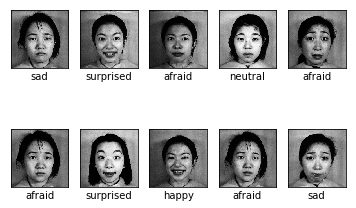

In [10]:
import matplotlib.pyplot as plt
import numpy as np

for images, cls_true in train_generator:
    print(images.shape)
    break
    
emotions = ['afraid', 'angry', 'disgusted', 'happy', 'neutral', 'sad', 'surprised']

fig, axes = plt.subplots(2, 5)

for i, ax in enumerate(axes.flat):
        # Plot image.
    ax.imshow(images[i], cmap='binary')

    # Show true and predicted classes.

    xlabel = emotions[np.argmax(cls_true[i])]


    # Show the classes as the label on the x-axis.
    ax.set_xlabel(xlabel)

    # Remove ticks from the plot.
    ax.set_xticks([])
    ax.set_yticks([])

# Ensure the plot is shown correctly with multiple plots
# in a single Notebook cell.
plt.show()

In [41]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 43264)             0         
__________

In [42]:
model.compile(optimizer=optimizers.Adam(2.5e-5),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy']
             )

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 6,
    epochs=200,
    validation_data=validation_generator,
    validation_steps=1
)

Epoch 1/200
6/6 [==============================] - 2s 300ms/step - loss: 1.9656 - acc: 0.1580 - val_loss: 1.9466 - val_acc: 0.1667
Epoch 2/200
6/6 [==============================] - 0s 81ms/step - loss: 1.9267 - acc: 0.1755 - val_loss: 1.9281 - val_acc: 0.0417
Epoch 3/200
6/6 [==============================] - 1s 84ms/step - loss: 1.9112 - acc: 0.2463 - val_loss: 1.9241 - val_acc: 0.1250
Epoch 4/200
6/6 [==============================] - 1s 87ms/step - loss: 1.8950 - acc: 0.2979 - val_loss: 1.9093 - val_acc: 0.3750
Epoch 5/200
6/6 [==============================] - 0s 81ms/step - loss: 1.8692 - acc: 0.3814 - val_loss: 1.9045 - val_acc: 0.2917
Epoch 6/200
6/6 [==============================] - 1s 83ms/step - loss: 1.8556 - acc: 0.3600 - val_loss: 1.8991 - val_acc: 0.2500
Epoch 7/200
6/6 [==============================] - 1s 92ms/step - loss: 1.8317 - acc: 0.4245 - val_loss: 1.8702 - val_acc: 0.3750
Epoch 8/200
6/6 [==============================] - 1s 95ms/step - loss: 1.8017 - acc: 0.4

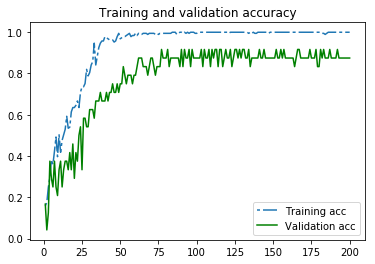

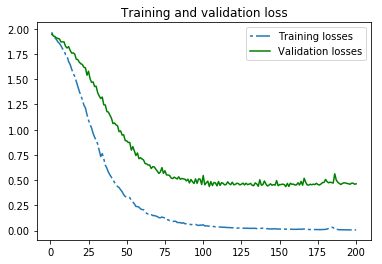

In [43]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, dashes=[2, 2, 10, 2], label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, dashes=[2, 2, 10, 2], label='Training losses')
plt.plot(epochs, val_loss, 'g', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Try using pretrined model

In [4]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(224, 224, 3))

In [5]:
model = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               12845568  
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 3591      
Total params: 27,563,847
Trainable params: 27,563,847
Non-trainable params: 0
_________________________________________________________________


In [6]:
conv_base.trainable = False
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

model.compile(
    optimizer=optimizers.Adam(lr=5e-5), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=6, 
                              epochs=5, 
                              validation_data=validation_generator, 
                              validation_steps=1)

This is the number of trainable weights before freezing the conv base: 4
Epoch 1/5
6/6 [==============================] - 7s 1s/step - loss: 1.9905 - categorical_accuracy: 0.1982 - val_loss: 1.8707 - val_categorical_accuracy: 0.3333
Epoch 2/5
6/6 [==============================] - 1s 229ms/step - loss: 1.7246 - categorical_accuracy: 0.3060 - val_loss: 1.7324 - val_categorical_accuracy: 0.3333
Epoch 3/5
6/6 [==============================] - 1s 224ms/step - loss: 1.5449 - categorical_accuracy: 0.5010 - val_loss: 1.7631 - val_categorical_accuracy: 0.2917
Epoch 4/5
6/6 [==============================] - 1s 233ms/step - loss: 1.3690 - categorical_accuracy: 0.5194 - val_loss: 1.5858 - val_categorical_accuracy: 0.3750
Epoch 5/5
6/6 [==============================] - 1s 226ms/step - loss: 1.2509 - categorical_accuracy: 0.7135 - val_loss: 1.5281 - val_categorical_accuracy: 0.5417


In [7]:
conv_base = model.layers[0]

conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [8]:
model.compile(
    optimizer=optimizers.Adam(lr=5e-5), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=6, 
                              epochs=30, 
                              validation_data=validation_generator, 
                              validation_steps=1)

Epoch 1/30
6/6 [==============================] - 3s 524ms/step - loss: 1.1888 - categorical_accuracy: 0.5987 - val_loss: 1.3417 - val_categorical_accuracy: 0.5417
Epoch 2/30
6/6 [==============================] - 2s 259ms/step - loss: 0.8301 - categorical_accuracy: 0.7471 - val_loss: 0.9686 - val_categorical_accuracy: 0.7917
Epoch 3/30
6/6 [==============================] - 2s 261ms/step - loss: 0.5505 - categorical_accuracy: 0.8815 - val_loss: 0.6380 - val_categorical_accuracy: 0.9167
Epoch 4/30
6/6 [==============================] - 2s 263ms/step - loss: 0.3231 - categorical_accuracy: 0.9625 - val_loss: 0.6230 - val_categorical_accuracy: 0.7083
Epoch 5/30
6/6 [==============================] - 2s 260ms/step - loss: 0.1964 - categorical_accuracy: 0.9843 - val_loss: 0.3822 - val_categorical_accuracy: 0.8750
Epoch 6/30
6/6 [==============================] - 2s 260ms/step - loss: 0.0990 - categorical_accuracy: 1.0000 - val_loss: 0.2832 - val_categorical_accuracy: 0.9583
Epoch 7/30
6/6 [

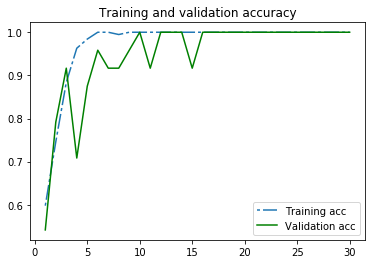

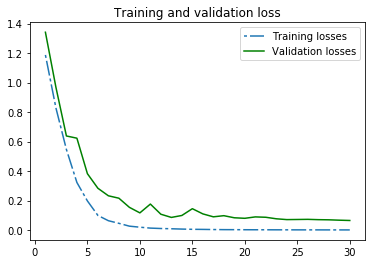

In [10]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, dashes=[2, 2, 10, 2], label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, dashes=[2, 2, 10, 2], label='Training losses')
plt.plot(epochs, val_loss, 'g', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
model.save('fully_trained_model.h5')

In [12]:
from keras.models import load_model
model = load_model('fully_trained_model.h5')

# Calculating individual accuracy

In [13]:
from keras.models import load_model
from os import listdir
from keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np

labels = {
    0 : "AF",
    1 : "AN",
    2 : "DI",
    3 : "HA",
    4 : "NE",
    5 : "SA",
    6 : "SU"
}

model = load_model('fully_trained_model.h5')

In [14]:
from keras.preprocessing.image import ImageDataGenerator
test_dir ="data\\test"


test_datagen = ImageDataGenerator(rescale=1./255)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size=24  # put batch size == total data
)

Found 24 images belonging to 7 classes.


In [29]:
result = [[0 for _ in range(7)] for _ in range(7)]


data, labels = test_generator.next()
labels = np.argmax(labels, axis=1)

predictions = model.predict(data)
predictions = np.argmax(predictions, axis=1)

for i in range(len(predictions)):
    result[labels[i]][predictions[i]] += 1

In [30]:
result

[[4, 0, 0, 0, 0, 0, 0],
 [0, 3, 0, 0, 0, 0, 0],
 [0, 0, 3, 0, 0, 0, 0],
 [0, 0, 0, 4, 0, 0, 0],
 [0, 0, 0, 0, 3, 0, 0],
 [0, 0, 0, 0, 0, 4, 0],
 [0, 0, 0, 0, 0, 0, 3]]